# Primera entrega trabajo final: Población carcelaria en Argentina 2022

**Autora del proyecto:** María Laura Barreto

**Fecha:** 20 de Noviembre 2024.

**Contacto:** marialaurabrt@gmail.com

---

## Descripción

El dataset utilizado en este proyecto proviene del Sistema Nacional de Estadísticas sobre Ejecución de la Pena (SNEEP), que recopila información detallada sobre las personas privadas de la libertad en Argentina según censo del año 2022. Este conjunto de datos incluye variables sociodemográficas, geográficas y relacionadas con el delito, como la edad, género, nivel educativo, tipo de delito, duración de la pena y ubicación de las unidades penitenciarias.

La problemática central radica en comprender los patrones y perfiles que caracterizan a esta población, con el fin de identificar grupos homogéneos que permitan un análisis más detallado. Esta segmentación puede ser clave para abordar desafíos como la reincidencia, la sobrepoblación carcelaria y la efectividad de los programas de reinserción, proporcionando herramientas para el diseño de políticas públicas más eficaces y focalizadas.

Fuente: https://datos.jus.gob.ar/dataset/sneep/archivo/2fc756fc-e531-4562-8343-91f810b9fa1b

---

## Objetivo

El proyecto tiene como objetivo obtener una comprensión profunda de los perfiles existentes en las cárceles argentinas, lo que permitirá predecir a qué grupo podría pertener una persona privada de la libertad con base a sus características iniciales.

Este enfoque tiene como finalidad principal aportar insights que contribuyan al diseño de políticas públicas específicas, como programas de inserción social y estrategias de prevención del delito.

---

## Hipótesis a explorar:

El objetivo principal de este proyecto es desarrollar un modelo predictivo para identificar grupos homogéneos en la población carcelaria. Algunas de las preguntas e hipótesis relacionadas al objetivo son:

1. **Edad y duración de la condena:**

Las personas de mayor edad tienden a recibir condenas más largas, mientras que los jóvenes (menores de 30 años) suelen recibir condenas más cortas, posiblemente debido a un mayor enfoque en la rehabilitación de los reclusos jóvenes.

2. **Nivel de instrucción y delitos graves:**

Las personas con un nivel de instrucción bajo (sin estudios secundarios completos) tienen una mayor probabilidad de cometer delitos graves, como homicidio y tentativa de homicidio, lo que podría estar relacionado con la falta de oportunidades y educación que incitan comportamientos violentos.

3. **Ocupación y tipo de delito:**

Aquellos individuos que estaban desempleados al momento de su detención tienen una mayor probabilidad de haber cometido delitos de "Robo" o "Hurto", debido a la falta de recursos económicos y la ausencia de un ingreso estable.

4. **Regionalización del delito:**

Los delitos relacionados con "Violaciones", "Abuso sexual" y "Otros delitos contra la integridad sexual" tienen una mayor incidencia en provincias con índices altos de pobreza y desigualdad económica (NEA y NOA), lo que sugiere una relación entre la pobreza estructural y la prevalencia de estos delitos.

5. **Vida dentro de la cárcel y salud mental:**

La tentativa de suicidio tiene una mayor incidencia en reclusos que no participan en actividades deportivas, lo que podría estar vinculado con la falta de oportunidades para aliviar el estrés y la ansiedad dentro del entorno penitenciario.

6. **Visitas y comportamiento**:

Aquellos reclusos que no reciben visitas son más propensos a intentar fugarse, lo que podría estar relacionado con el aislamiento emocional y la falta de apoyo social, lo que aumenta el deseo de escapar de la cárcel.

---

# 1. Importación de datos y librerías

In [ ]:
# Importación de librerías para manipulación de datos y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importación del dataset alojado en Google Drive

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

df = pd.read_csv('/content/drive/My Drive/sneep-2022.csv')

import pandas as pd

Mounted at /content/drive


# 2. Análisis exploratorio de los datos

## 2.1 Información general sobre el dataset

In [ ]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105053 entries, 0 to 105052
Data columns (total 86 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   censo_anio                                          105053 non-null  int64  
 1   provincia_sneep_id                                  105053 non-null  int64  
 2   provincia_descripcion                               105053 non-null  object 
 3   establecimiento_id                                  105053 non-null  int64  
 4   establecimiento_descripcion                         105053 non-null  object 
 5   edad                                                105053 non-null  int64  
 6   genero_id                                           105053 non-null  int64  
 7   genero_descripcion                                  105053 non-null  object 
 8   nacionalidad_id                                     105053 non-n

In [ ]:
# Tamaño del dataset
print("Filas, columnas: ", df.shape)

Filas, columnas:  (105053, 86)


In [ ]:
df.columns

Index(['censo_anio', 'provincia_sneep_id', 'provincia_descripcion',
       'establecimiento_id', 'establecimiento_descripcion', 'edad',
       'genero_id', 'genero_descripcion', 'nacionalidad_id',
       'nacionalidad_descripcion', 'estado_civil_id',
       'estado_civil_descripcion', 'nivel_instruccion_id',
       'nivel_instruccion_descripcion', 'ultima_situacion_laboral_id',
       'ultima_situacion_laboral_descripcion',
       'capacitacion_laboral_al_ingresar_id',
       'capacitacion_laboral_al_ingresar_descripcion',
       'ultimo_lugar_residencia_id', 'ultimo_lugar_residencia_descripcion',
       'ultima_provincia_residencia_sneep_id',
       'ultima_provincia_residencia_descripcion', 'jurisdiccion_id',
       'jurisdiccion_descripcion', 'situacion_legal_id',
       'situacion_legal_descripcion', 'fecha_detencion', 'fecha_condenado',
       'establecimiento_procedencia_id',
       'establecimiento_procedencia_descripcion', 'delito1_id',
       'delito1_descripcion', 'delito2_id

In [ ]:
# Estadísticas descriptivas de las variables numéricas
df.describe(include=[np.number])

,censo_anio,provincia_sneep_id,establecimiento_id,edad,genero_id,nacionalidad_id,estado_civil_id,nivel_instruccion_id,ultima_situacion_laboral_id,capacitacion_laboral_al_ingresar_id,...,reparticion_id,tuvo_salidas_transitorias_id,incorporado_reg_semi_libertad_id,participa_programa_pre_libertad,participa_programa_prision_discontinua_id,participa_programa_semi_detencion_id,tuvo_reduccion_pena_id,mujer_tiene_hijos_intramuro,provincia_id,ultima_provincia_residencia_id
count,105053.0,105053.000000,105053.000000,105053.000000,105053.000000,105053.000000,105053.000000,105053.000000,105053.000000,105053.000000,...,105053.000000,105053.000000,105053.000000,57362.000000,105053.000000,105053.000000,105053.000000,4256.000000,105053.000000,104611.000000
mean,2022.0,6.433838,206.074058,35.478568,1.044673,1.227266,1.512056,3.208000,2.015288,1.945523,...,1.216500,0.586970,0.585742,0.140075,0.562364,0.558337,2.122748,0.016682,26.358181,24.192504
std,0.0,7.284031,151.141354,11.409323,0.220234,1.222314,1.399102,1.311272,0.887385,0.981210,...,0.621395,0.581845,0.528451,0.347068,0.519639,0.513068,1.963790,0.128093,27.962967,26.935257
min,2022.0,1.000000,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
25%,2022.0,1.000000,86.000000,27.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,6.000000
50%,2022.0,1.000000,181.000000,33.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,4.000000,0.000000,6.000000,6.000000
75%,2022.0,12.000000,270.000000,42.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,4.000000,0.000000,50.000000,50.000000
max,2022.0,24.000000,612.000000,90.000000,5.000000,16.000000,6.000000,9.000000,3.000000,3.000000,...,3.000000,4.000000,4.000000,1.000000,4.000000,4.000000,4.000000,1.000000,94.000000,94.000000


In [ ]:
# Frecuencia de valores únicos en las variables categóricas
for col in df.select_dtypes(include=['object']).columns:
    print("\nFrecuencia de valores únicos de", col)
    print(df[col].value_counts())


Frecuencia de valores únicos de provincia_descripcion
provincia_descripcion
Buenos Aires              52960
Córdoba                   10914
Santa Fe                   7722
Mendoza                    6253
Salta                      4559
Entre Rios                 2540
Misiones                   1930
San Juan                   1804
Chaco                      1802
Río Negro                  1679
Tucumán                    1461
Ciudad de Buenos Aires     1458
Corrientes                 1292
Jujuy                      1250
Chubut                     1161
Santiago del Estero        1099
Neuquén                    1058
La Pampa                    949
San Luis                    763
Formosa                     741
La Rioja                    463
Santa Cruz                  462
Catamarca                   449
Tierra del Fuego            284
Name: count, dtype: int64

Frecuencia de valores únicos de establecimiento_descripcion
establecimiento_descripcion
UNIDAD  1 - LISANDRO OLMOS              

## 2.2 Identificación de valores nulos

In [ ]:
# Suma de valores nulos por columna en mi dataset
df.isna().sum()

,0
censo_anio,0
provincia_sneep_id,0
provincia_descripcion,0
establecimiento_id,0
establecimiento_descripcion,0
...,...
tuvo_reduccion_pena_id,0
tuvo_reduccion_pena_descripcion,46512
mujer_tiene_hijos_intramuro,100797
provincia_id,0


In [ ]:
# Proporción de valores nulos por columnas, expresado en %. Arroja únicamente valores > 0%
df_na_proporcion = df.isna().sum() / df.shape[0] * 100
df_na_proporcion_significativos = df_na_proporcion[df_na_proporcion > 0]
df_na_proporcion_significativos

,0
nacionalidad_descripcion,0.033317
estado_civil_descripcion,2.189371
nivel_instruccion_descripcion,2.209361
ultima_situacion_laboral_descripcion,3.604847
capacitacion_laboral_al_ingresar_descripcion,2.427346
ultimo_lugar_residencia_descripcion,0.940478
ultima_provincia_residencia_descripcion,0.420740
jurisdiccion_descripcion,0.015230
fecha_detencion,4.204544
fecha_condenado,46.540318


## 2.3 Limpieza y transformación de datos

In [ ]:
# Se eliminan columnas que pertenecen a información interna del SNEEP (ids), que no serán requeridos por el modelo.

df.drop(['provincia_sneep_id', 'establecimiento_id', 'genero_id', 'nacionalidad_id', 'estado_civil_id', 'nivel_instruccion_id', 'ultima_situacion_laboral_id', 'capacitacion_laboral_al_ingresar_id', 'ultimo_lugar_residencia_id', 'ultima_provincia_residencia_sneep_id', 'ultima_provincia_residencia_sneep_id', 'ultima_provincia_residencia_sneep_id', 'jurisdiccion_id', 'situacion_legal_id', 'establecimiento_procedencia_id', 'delito1_id', 'delito2_id', 'delito3_id', 'delito4_id', 'delito5_id', 'horas_trabajo_remunerado_id', 'participacion_programa_educativo_id', 'participo_alteracion_orden_ult_anio_id', 'tipo_infraccion_disciplinaria_id', 'sancion_aplicada_id', 'calificacion_conducta_id', 'tentativa_fugas_evasiones_id', 'fue_lesionado_id', 'es_reincidente_id', 'tiene_periodo_progresividad_id', 'reparticion_id', 'tuvo_salidas_transitorias_id', 'incorporado_reg_semi_libertad_id', 'participa_programa_prision_discontinua_id', 'participa_programa_semi_detencion_id', 'tuvo_reduccion_pena_id', 'provincia_id', 'ultima_provincia_residencia_id'], axis=1, inplace=True)

In [ ]:
# Se eliminan columnas que no se consideran relevantes por carecer de información útil para el modelo.
# censo_anio: La variable contiene un valor único (2022).
# fecha_condenado, delito2_descripcion, delito3_descripcion, delito4_descripcion, delito5_descripcion, mujer_tiene_hijos_intramuro, sancion_aplicada_descripcion, tipo_condena, tuvo_reduccion_pena_descripcio: Contiene una alta tasa de valores faltantes.

df.drop(['censo_anio', 'fecha_condenado', 'delito2_descripcion', 'delito3_descripcion', 'delito4_descripcion', 'delito5_descripcion', 'mujer_tiene_hijos_intramuro', 'sancion_aplicada_descripcion', 'tipo_condena'], axis=1, inplace=True)

In [ ]:
# Se renombra a las columnas que poseen la palabra descripcion, con el fin de mejorar la legibilidad de las columnas

columns_with_descripcion = df.columns[df.columns.str.contains('descripcion')]
rename_dict = {col: col.replace('descripcion', '').strip('_') for col in columns_with_descripcion}

df.rename(columns=rename_dict, inplace=True)

## 2.4 Diccionario de variables

Las variables del conjunto son las siguientes:

- provincia: Indica la provincia en la que se encuentra el recluso.
establecimiento: Nombre del establecimiento penitenciario donde está recluido el individuo.
- edad: Edad del recluso en el momento de la detención.
- genero: Género del recluso (masculino, femenino, etc.).
- nacionalidad: Nacionalidad del recluso.
- estado_civil: Estado civil del recluso (soltero, casado, etc.).
- nivel_instruccion: Nivel educativo alcanzado por el recluso.
- ultima_situacion_laboral: Última situación laboral antes de la detención (empleado, desempleado, etc.).
- capacitacion_laboral_al_ingresar: Indica si el recluso recibió capacitación laboral al ingresar al sistema penitenciario.
- ultimo_lugar_residencia: Último lugar de residencia antes de la detención.
- ultima_provincia_residencia: Provincia donde residía el recluso antes de su detención.
- jurisdiccion: Jurisdicción legal correspondiente al caso del recluso.
- situacion_legal: Estado legal del recluso (procesado, condenado, etc.).
- fecha_detencion: Fecha en que el recluso fue detenido.
- establecimiento_procedencia: Establecimiento penitenciario de donde proviene el recluso, si fue transferido.
- elito1: Delito principal por el cual fue detenido el recluso.
- horas_trabajo_remunerado: Número de horas trabajadas remuneradamente dentro del sistema penitenciario.
- participacion_programa_laboral: Indica si el recluso participa en un programa laboral dentro del penal.
- participacion_programa_educativo: Indica si el recluso participa en un programa educativo dentro del penal.
- participacion_actividades_deportivas: Indica si el recluso participa en actividades deportivas dentro del penal.
- recibio_atencion_medica_ult_anio: Indica si el recluso recibió atención médica en el último año.
- recibio_atencion_medica_ult_anio: Indica si el recluso recibió atención médica en el último año (puede ser redundante).
- recibio_visitas_ultimo_anio: Indica si el recluso recibió visitas en el último año.
- participo_alteracion_orden_ult_anio: Indica si el recluso participó en alteraciones del orden durante el último año.
- tipo_infraccion_disciplinaria: Tipo de infracción disciplinaria cometida por el recluso dentro del penal.
- calificacion_conducta: Calificación de la conducta del recluso dentro del sistema penitenciario.
- tentativa_fugas_evasiones: Indica si el recluso ha intentado escapar del penal.
- tentativa_suicidio: Indica si el recluso ha intentado suicidarse dentro del penal.
- fue_lesionado: Indica si el recluso fue lesionado durante su tiempo de reclusión.
- duracion_condena_anios: Duración de la condena del recluso en años.
- duracion_condena_meses: Duración de la condena del recluso en meses.
- duracion_condena_rango: Rango de duración de la condena.
- es_reincidente: Indica si el recluso es reincidente en la comisión de delitos.
- tiene_periodo_progresividad: Indica si el recluso tiene derecho a un período de progresividad en su condena.
- reparticion: Departamento o área administrativa a cargo del recluso dentro del sistema penitenciario.
- tuvo_salidas_transitorias: Indica si el recluso tuvo salidas transitorias del penal.
- incorporado_reg_semi_libertad: Indica si el recluso fue incorporado al régimen de semi libertad.
- participa_programa_pre_libertad: Indica si el recluso participa en un programa de prelibertad.
- participa_programa_prision_discontinua: Indica si el recluso participa en un programa de prisión discontinua.
- participa_programa_semi_detencion: Indica si el recluso participa en un programa de semi-detención.
- tuvo_reduccion_pena: Indica si el recluso ha tenido una reducción en su pena.

## 2.5 Información general sobre el dataset (clean)

In [ ]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105053 entries, 0 to 105052
Data columns (total 41 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   provincia                               105053 non-null  object 
 1   establecimiento                         105053 non-null  object 
 2   edad                                    105053 non-null  int64  
 3   genero                                  105053 non-null  object 
 4   nacionalidad                            105018 non-null  object 
 5   estado_civil                            102753 non-null  object 
 6   nivel_instruccion                       102732 non-null  object 
 7   ultima_situacion_laboral                101266 non-null  object 
 8   capacitacion_laboral_al_ingresar        102503 non-null  object 
 9   ultimo_lugar_residencia                 104065 non-null  object 
 10  ultima_provincia_residencia             1046

In [ ]:
# Tamaño del dataset
print("Filas, columnas: ", df.shape)

Filas, columnas:  (105053, 41)


In [ ]:
df.columns

Index(['provincia', 'establecimiento', 'edad', 'genero', 'nacionalidad',
       'estado_civil', 'nivel_instruccion', 'ultima_situacion_laboral',
       'capacitacion_laboral_al_ingresar', 'ultimo_lugar_residencia',
       'ultima_provincia_residencia', 'jurisdiccion', 'situacion_legal',
       'fecha_detencion', 'establecimiento_procedencia', 'delito1',
       'horas_trabajo_remunerado', 'participacion_programa_laboral',
       'participacion_programa_educativo',
       'participacion_actividades_deportivas',
       'recibio_atencion_medica_ult_anio', 'recibio_atencion_medica_ult_anio',
       'recibio_visitas_ultimo_anio', 'participo_alteracion_orden_ult_anio',
       'tipo_infraccion_disciplinaria', 'calificacion_conducta',
       'tentativa_fugas_evasiones', 'tentativa_suicidio', 'fue_lesionado',
       'duracion_condena_anios', 'duracion_condena_meses',
       'duracion_condena_rango', 'es_reincidente',
       'tiene_periodo_progresividad', 'reparticion',
       'tuvo_salidas_trans

In [ ]:
# Estadísticas descriptivas de las variables numéricas
df.describe(include=[np.number])

,edad,participacion_programa_laboral,participacion_actividades_deportivas,recibio_atencion_medica_ult_anio,recibio_visitas_ultimo_anio,tentativa_suicidio,duracion_condena_anios,duracion_condena_meses,duracion_condena_rango,participa_programa_pre_libertad
count,105053.000000,101455.000000,102411.000000,105053.000000,98455.000000,105053.000000,105053.000000,105053.000000,105053.000000,57362.000000
mean,35.478568,0.202188,0.721856,4.732583,0.880138,0.053373,4.149248,1.264048,1.605037,0.140075
std,11.409323,0.401634,0.448087,6.755380,0.324802,0.320601,5.584234,2.666892,1.865229,0.347068
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000
75%,42.000000,0.000000,1.000000,2.000000,1.000000,0.000000,6.000000,0.000000,3.000000,0.000000
max,90.000000,1.000000,1.000000,19.000000,1.000000,2.000000,80.000000,45.000000,7.000000,1.000000


# 3. Gráficos e interpretaciones

## Hipótesis #1: **Edad y duración de la condena**

Las personas de mayor edad tienden a recibir condenas más largas, mientras que los jóvenes (menores de 30 años) suelen recibir condenas más cortas, posiblemente debido a un mayor enfoque en la rehabilitación de los reclusos jóvenes.

Gráficos utilizados: Scatterplot + Gráfico de barras

In [ ]:
# Se eliminan filas con valores NaN en 'edad' / 'duracion_condena_anios'
df_clean = df.dropna(subset=['edad', 'duracion_condena_anios'])

# Se crea función para categorizar las edades
def categoria_edad(edad):
    if edad < 30:
        return 'joven'
    elif 30 <= edad < 60:
        return 'adulto'
    else:
        return 'adulto mayor'

# Se aplica la función a la columna 'edad'
df_clean['categoria'] = df_clean['edad'].apply(categoria_edad)

### Scatterplot

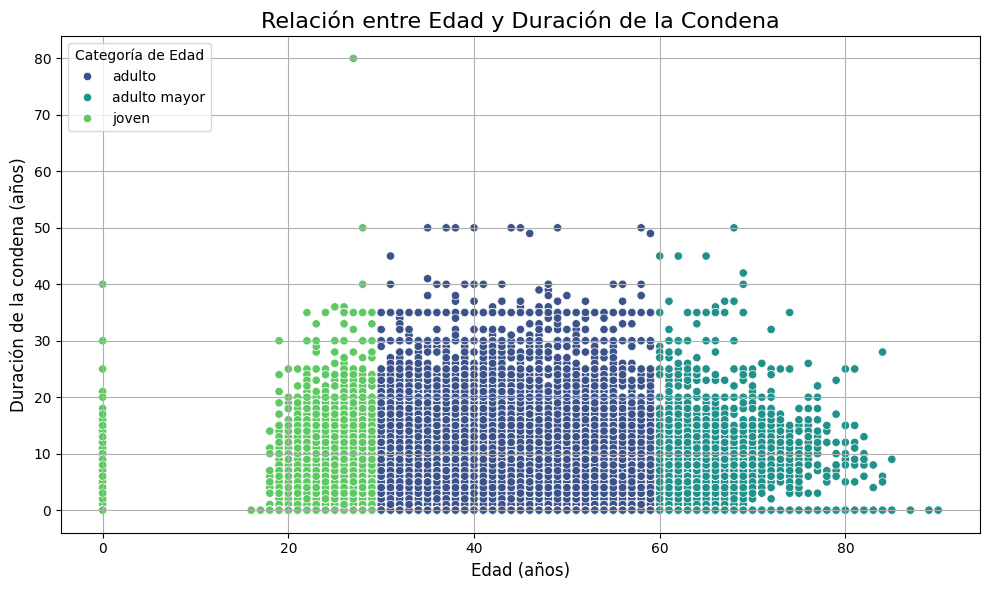

In [ ]:
# Se crea el scatterplot con Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='edad',
    y='duracion_condena_anios',
    data=df_clean,
    hue='categoria',
    palette='viridis',
)

# Personalización
plt.title('Relación entre Edad y Duración de la Condena', fontsize=16)
plt.xlabel('Edad (años)', fontsize=12)
plt.ylabel('Duración de la condena (años)', fontsize=12)
plt.grid(True)
plt.legend(title='Categoría de Edad', loc='upper left')


plt.tight_layout()
plt.show()

Este gráfico muestra la relación entre la edad y la duración de la condena.

### Gráfico de barras horizontal

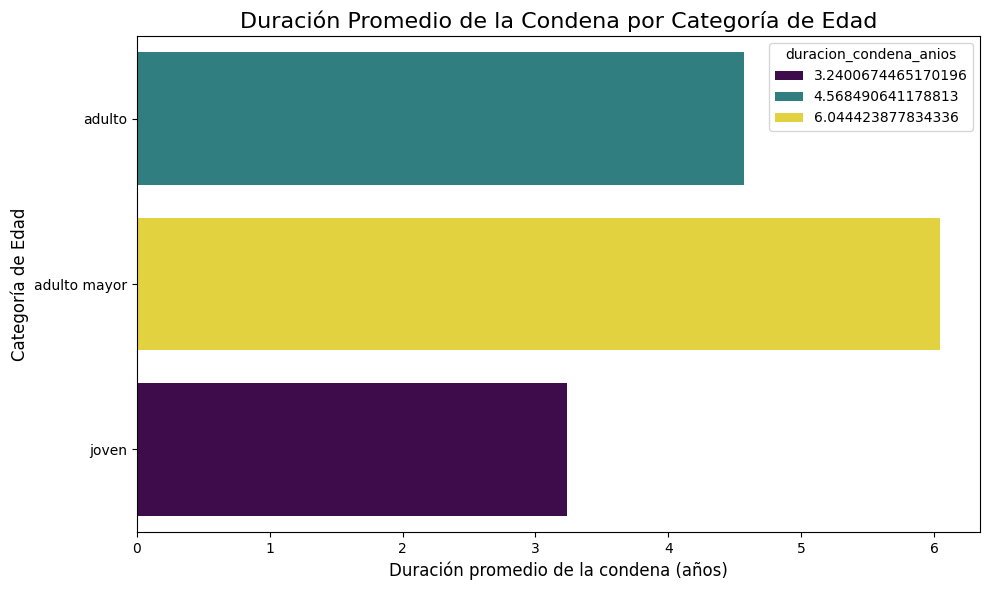

In [ ]:
# Se calcula la duración promedio de condena por cada categoría de edad
avg_duracion = df_clean.groupby('categoria')['duracion_condena_anios'].mean().reset_index()

# Se crea el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    x='duracion_condena_anios',
    y='categoria',
    data=avg_duracion,
    hue='duracion_condena_anios',
    palette='viridis'
)

plt.title('Duración Promedio de la Condena por Categoría de Edad', fontsize=16)
plt.xlabel('Duración promedio de la condena (años)', fontsize=12)
plt.ylabel('Categoría de Edad', fontsize=12)
plt.tight_layout()  # Ajusta los márgenes para evitar solapamiento
plt.show()

### Hallazgos en relación a la hipótesis

- (Barplot) Distribución relativamente uniforme de la duración de las condenas: No se observa una relación clara entre edad y duración de la condena. Las condenas no son significativamente más largas para los mayores ni más cortas para los jóvenes.

- (Scatterplot) Pico a los 35 años de condena: Existe un patrón alrededor de los 35 años de condena que se observa en el scatterplot, pero no está relacionado con la edad de los reclusos.

- Falta de evidencia para la rehabilitación: Los jóvenes no parecen recibir condenas significativamente más cortas en comparación con los adultos mayores, lo que debilita la hipótesis sobre la rehabilitación.

- Las condenas de larga duración son menos frecuentes: La mayoría de las personas en el sistema judicial recibe sentencias relativamente cortas, independientemente de su grupo de edad.

Conclusión:
La hipótesis no se cumple de manera clara y contundente en los datos. Según este dataset, los resultados muestran que las condenas no están estrechamente relacionadas con la edad de los individuos.

## Hipótesis #2: **Nivel de instrucción y delitos graves**

Las personas con un nivel de instrucción bajo (sin estudios secundarios completos) tienen una mayor probabilidad de cometer delitos graves, como homicidio y tentativa de homicidio, lo que podría estar relacionado con la falta de oportunidades y educación que incitan comportamientos violentos.

Gráficos utilizados: Gráfico de barras


In [ ]:
# Se filtran los reclusos con delitos graves
delitos_graves = df[df['delito1'].isin(['Homicidios dolosos', 'Homicidios dolosos (tent.)'])]

### Gráfico de barras (countplot)

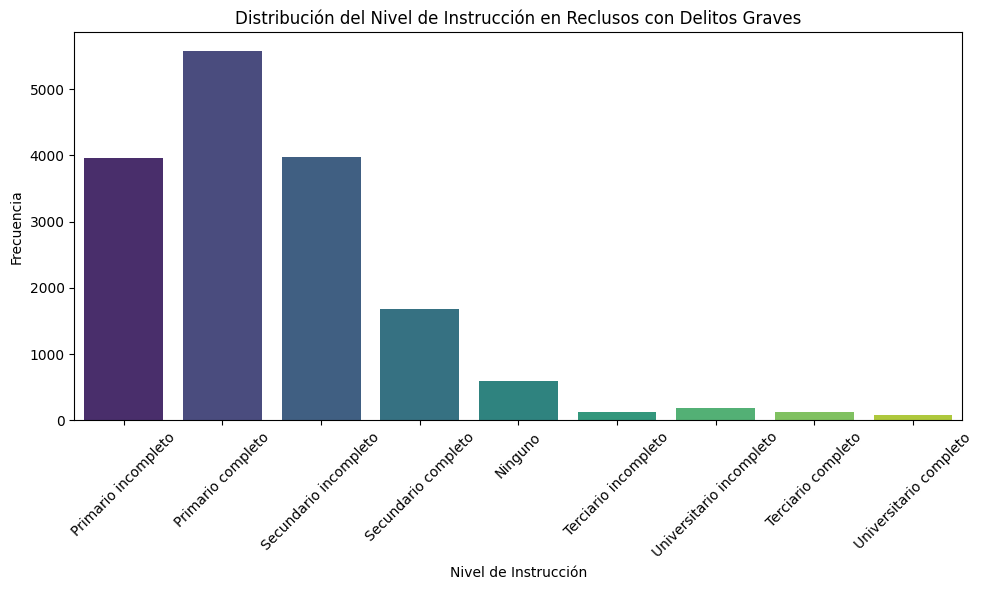

In [ ]:
# Se filtran los reclusos con delitos graves
delitos_graves = df[df['delito1'].isin(['Homicidios dolosos', 'Homicidios dolosos (tent.)'])]

# Crear el gráfico de barras para la distribución del nivel de instrucción con seaborn
plt.figure(figsize=(10, 6))
sns.countplot(
    data=delitos_graves,
    x='nivel_instruccion',
    hue='nivel_instruccion',
    legend=False,
    palette='viridis'
)

# Personalizar el gráfico
plt.title('Distribución del Nivel de Instrucción en Reclusos con Delitos Graves')
plt.xlabel('Nivel de Instrucción')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X si es necesario
plt.tight_layout()  # Ajustar el espacio para que no se sobrepongan elementos
plt.show()


### Hallazgos en relación a la hipótesis

- Concentración en niveles bajos de instrucción: La mayoría de los reclusos con delitos graves tienen un nivel de instrucción bajo. Esto parece respaldar la hipótesis de que las personas con menos acceso a educación formal pueden estar más involucradas en delitos graves.

- Diferenciación dentro del nivel secundario: Aunque hay una caída notable en secundario completo en comparación con secundario incompleto, no se observa un corte drástico que señale directamente que completar o no el nivel secundario sea un factor determinante.

Conclusión:
Aunque los datos muestran que los reclusos con menores niveles educativos son más, no es suficiente para concluir causalidad directa. El gráfico respalda parcialmente la hipótesis al mostrar una mayor incidencia de delitos graves entre personas con bajo nivel de instrucción. Se advierte que la causa puede ser multifactorial, siendo la educación formal una de las variables.[texto del vínculo

## Hipótesis #3: **Ocupación y tipo de delito**

Aquellos individuos que estaban desempleados al momento de su detención tienen una mayor probabilidad de haber cometido delitos de "Robo" o "Hurto", debido a la falta de recursos económicos y la ausencia de un ingreso estable.

Gráficos utilizados: Gráfico de torta

In [ ]:
# Se filtran los reclusos con delito primario de Robo o Hurto
delitos_robo_hurto = df[df['delito1'].isin(['Robo y/o tentativa de robo', 'Hurto y/o tentativa de hurto'])]

# Se agrupan por ocupación y contar los casos
ocupacion_delitos = delitos_robo_hurto['ultima_situacion_laboral'].value_counts()

### Gráfico de torta

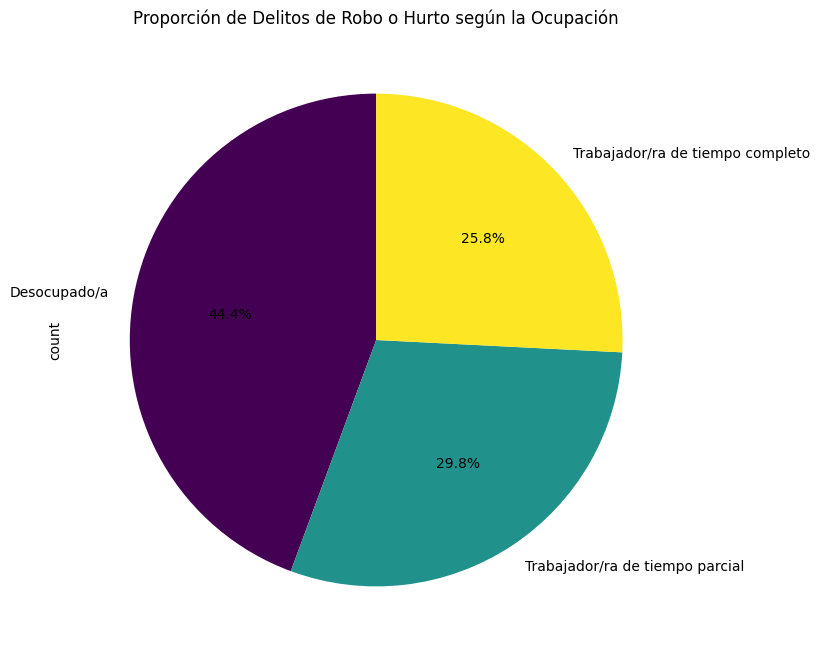

In [ ]:
# Se crea el gráfico de torta
plt.figure(figsize=(8, 8))

ocupacion_delitos.plot(
    kind='pie',
    startangle=90,
    autopct='%1.1f%%',
    colormap='viridis')
plt.title('Proporción de Delitos de Robo o Hurto según la Ocupación')

plt.show()


### Hallazgos en relación a la hipótesis

- Mayor proporción de desempleados/as: Según el gráfico, las personas desempleadas representan el mayor porcentaje (44.4%) de los delitos de robo, hurto o tentativa. Esto podría sugerir una relación entre la falta de empleo y la incidencia de estos delitos.

- Presencia relevante de trabajadores/as a tiempo parcial: Este dato podría indicar que una parte significativa de los involucrados tiene algún tipo de ingreso, aunque podría no ser suficiente para satisfacer sus necesidades económicas.

- Menor incidencia entre trabajadores/as a tiempo completo: La proporción más baja corresponde a trabajadores/as a tiempo completo, lo que podría indicar que la estabilidad laboral está asociada con una menor probabilidad de cometer estos delitos.

Conclusión: El gráfico respalda parcialmente la hipótesis al mostrar que los desempleados/as representan la mayoría en esta categoría delictiva. Sin embargo, la incidencia significativa de trabajadores/as a tiempo parcial sugiere que otros factores, como ingresos insuficientes o vulnerabilidad económica, también pueden influir en la comisión de delitos.

## Hipótesis #4: **Regionalización del delito**

Los delitos relacionados con "Violaciones", "Abuso sexual" y "Otros delitos contra la integridad sexual" tienen una mayor incidencia en provincias con índices altos de pobreza y desigualdad económica (NEA y NOA), lo que sugiere una relación entre la pobreza estructural y la prevalencia de estos delitos.

Gráficos utilizados: gráfico de barras



In [ ]:
# Se filtran los delitos relacionados con integridad sexual
delitos_integridad_sexual = df[df['delito1'].isin(['Violaciones/Abuso sexual', 'Otros delitos contra la integridad sexual'])]

# Se crea una función para mapear provincias a regiones
def mapear_region(provincia):
    if provincia in ['Ciudad de Buenos Aires', 'Buenos Aires']:
        return 'Buenos Aires'
    elif provincia in ['Catamarca', 'Jujuy', 'La Rioja', 'Salta', 'Santiago del Estero', 'Tucumán']:
        return 'NOA'
    elif provincia in ['Corrientes', 'Chaco', 'Formosa', 'Misiones']:
        return 'NEA'
    elif provincia in ['Mendoza', 'San Juan', 'San Luis']:
        return 'Cuyo'
    elif provincia in ['Córdoba', 'Entre Rios', 'La Pampa', 'Santa Fe']:
        return 'Pampeana'
    elif provincia in ['Río Negro', 'Neuquén', 'Chubut', 'Santa Cruz', 'Tierra del Fuego']:
        return 'Patagonia'
    else:
        return 'Otra'

# Se crea la nueva columna 'region'
df['region'] = df['provincia'].apply(mapear_region)

# Se agrupan los datos por región y se cuentan los casos
delitos_por_region = delitos_integridad_sexual['region'].value_counts()


### Gráfico de barras

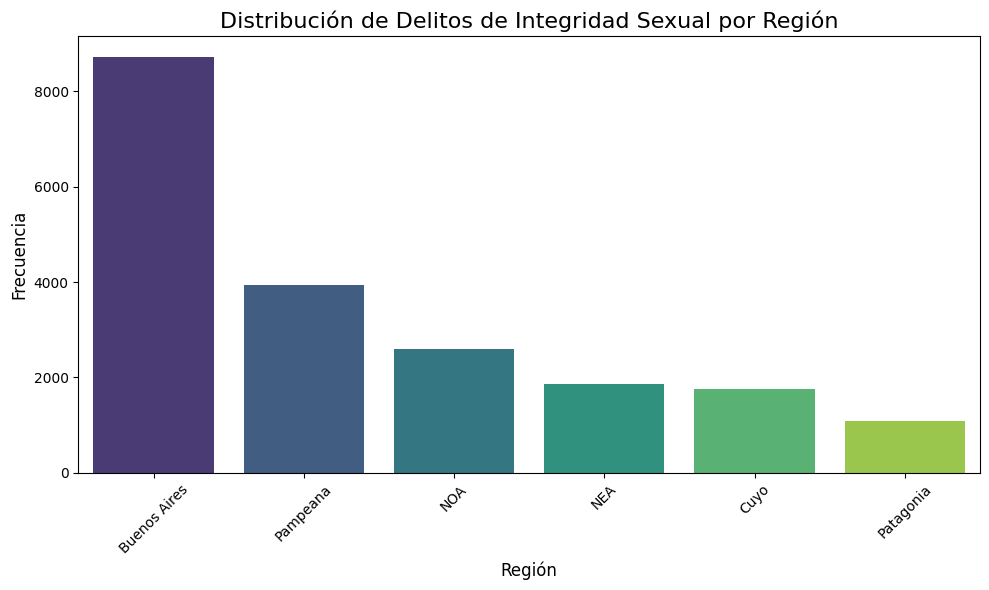

In [ ]:
# Crear el gráfico de barras

plt.figure(figsize=(10, 6))
sns.barplot(
    x=delitos_por_region.index,
    y=delitos_por_region.values,
    hue=delitos_por_region.index,
    legend=False,
    palette='viridis'
)

plt.title('Distribución de Delitos de Integridad Sexual por Región', fontsize=16)
plt.xlabel('Región', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Hallazgos en relación a la hipótesis

- Alta concentración en Buenos Aires: Destaca por tener la mayor frecuencia de delitos de este tipo, superando ampliamente al resto de las regiones. Esto sugiere que otros factores, como el número de población o el acceso a canales de denuncia podrían ser factores a considerar.

- Moderada incidencia en NEA y NOA: Aunque las regiones de NEA y NOA, asociadas a altos niveles de pobreza y desigualdad económica, presentan una incidencia considerable, están por debajo de Buenos Aires y la región Pampeana en términos absolutos.

- Regiones con menor frecuencia: Cuyo y Patagonia tienen las frecuencias más bajas, lo que podría estar relacionado con menor densidad poblacional o de denuncias.

Conclusiones: El gráfico muestra que la región de Buenos Aires concentra la mayoría de los delitos contra la integridad sexual, lo que cuestiona la hipótesis de que estas incidencias están principalmente vinculadas a regiones con altos índices de pobreza estructural como NEA y NOA. Sin embargo, es importante considerar que los factores como densidad poblacional, acceso a la justicia y cultura de la denuncia pueden influir significativamente en estos resultados. Se recomienda la evaluación en términos relativos a la densidad poblacional en primera instancia.

## Hipótesis #5: **Vida dentro de la cárcel y salud mental**

La tentativa de suicidio tiene una mayor incidencia en reclusos que no participan en actividades deportivas, lo que podría estar vinculado con la falta de oportunidades para aliviar el estrés y la ansiedad dentro del entorno penitenciario.

Gráficos utilizados: Gráfico de barras


In [ ]:
# Se reemplazan los valores en participacion_actividades_deportivas
df['participacion_actividades_deportivas'] = df['participacion_actividades_deportivas'].replace({1: 'Sí', 0: 'No'})

# Se crea una columna booleana para tentativa de suicidio (Sí o No)
df['tentativa_suicidio_boolean'] = df['tentativa_suicidio'].apply(lambda x: 'Sí' if pd.notna(x) and x > 0 else 'No')

# Se agrupan y cuentan los datos
conteo_suicidio = df.groupby(['participacion_actividades_deportivas', 'tentativa_suicidio_boolean']).size().reset_index(name='count')

### Gráfico de barras

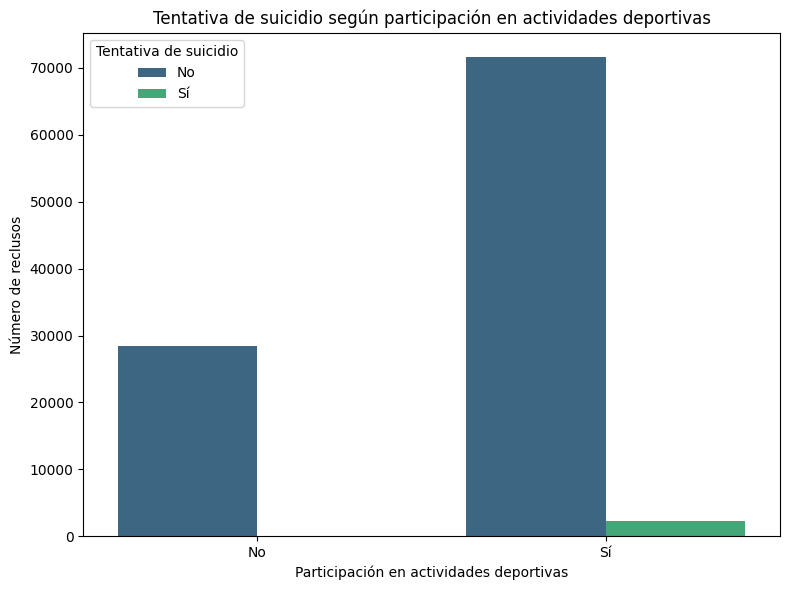

In [ ]:
# Se crea el gráfico con seaborn
plt.figure(figsize=(8, 6))
sns.barplot(
    data=conteo_suicidio,
    x='participacion_actividades_deportivas',
    y='count',
    hue='tentativa_suicidio_boolean',
    palette='viridis'
)

# Personalización
plt.title('Tentativa de suicidio según participación en actividades deportivas')
plt.xlabel('Participación en actividades deportivas')
plt.ylabel('Número de reclusos')
plt.legend(title='Tentativa de suicidio', loc='upper left')
plt.tight_layout()
plt.show()


El gráfico presenta la cantidad total de reclusos, tanto aquellos con intentos de suicidio como los que no, y su participación en actividades deportivas representada en el eje Y. Sin embargo, dado que el número de personas sin intentos de suicidio es significativamente mayor, la relación entre la práctica deportiva y los intentos de suicidio no resulta claramente visible.

Se intenta un nuevo acercamiento, en el cual en lugar de analizar toda la población, nos centraremos exclusivamente en aquellos reclusos que cometieron una tentativa de suicidio.

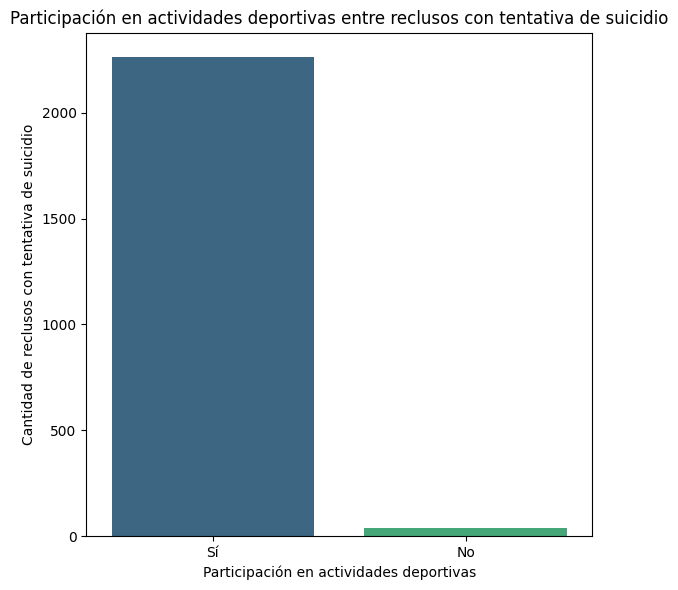

In [ ]:
# Se filtra población con tentativa de suicidio
suicidio_df = df[df['tentativa_suicidio'] > 0]

# Contar la participación en actividades deportivas entre reclusos con tentativa de suicidio
suicidio_deportiva = (
    suicidio_df['participacion_actividades_deportivas']
    .value_counts()
    .rename(index={0: 'No', 1: 'Sí'})
    .reset_index()
)
suicidio_deportiva.columns = ['Participación en actividades deportivas', 'Cantidad']

# Se crea el gráfico con seaborn
plt.figure(figsize=(6, 6))
sns.barplot(
    data=suicidio_deportiva,
    x='Participación en actividades deportivas',
    y='Cantidad',
    hue='Participación en actividades deportivas',
    palette='viridis'
)

# Personalización
plt.title('Participación en actividades deportivas entre reclusos con tentativa de suicidio')
plt.xlabel('Participación en actividades deportivas')
plt.ylabel('Cantidad de reclusos con tentativa de suicidio')
plt.tight_layout()
plt.show()

### Hallazgos en relación a la hipótesis

- Predominio de reclusos que participan en actividades deportivas: La gran mayoría de los reclusos con tentativas de suicidio participa en actividades deportivas. Un porcentaje mucho menor no participa en actividades deportivas.

Conclusión: El análisis preliminar no apoya la hipótesis de que los reclusos que no participan en actividades deportivas tienen una mayor incidencia de tentativas de suicidio. De hecho, según el dataset, la mayor parte de las tentativas ocurre entre aquellos que sí participan en dichas actividades.

## Hipótesis #6: **Visitas y comportamiento**

Aquellos reclusos que no reciben visitas son más propensos a intentar fugarse, lo que podría estar relacionado con el aislamiento emocional y la falta de apoyo social, lo que aumenta el deseo de escapar de la cárcel.

Gráficos utilizados: Gráfico de bararas agrupadas


In [ ]:
# Se toma la decisión de rellenar los valores NaN para tenerlos en cuenta dentro del análisis sobre la población total.

df['recibio_visitas_ultimo_anio'] = df['recibio_visitas_ultimo_anio'].fillna('Desconocido')
df['tentativa_fugas_evasiones'] = df['tentativa_fugas_evasiones'].fillna('Desconocido')

### Gráfico de barras (count)

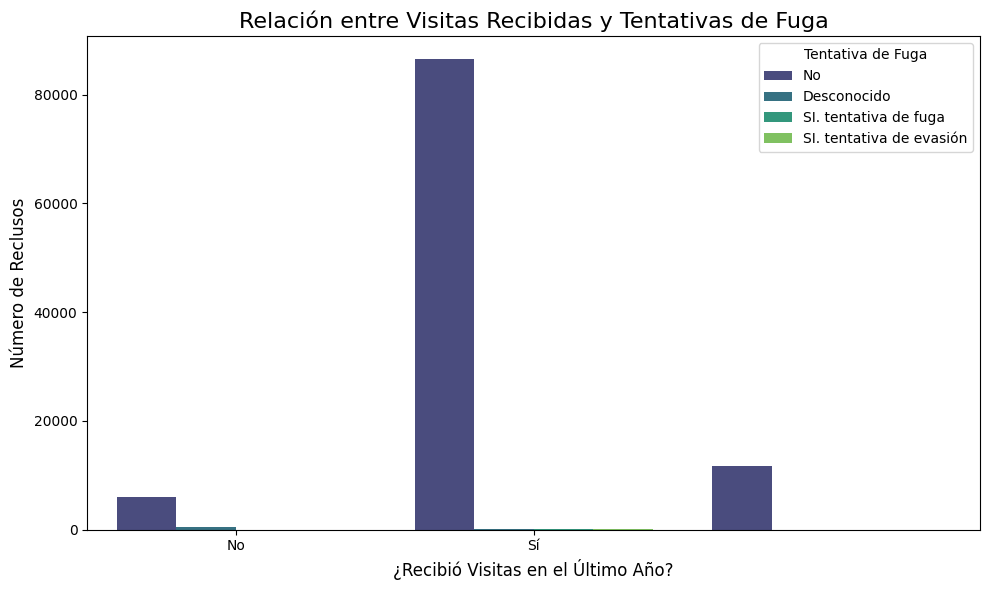

In [ ]:
# Crear el gráfico de barras agrupadas con seaborn
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='recibio_visitas_ultimo_anio',
    hue='tentativa_fugas_evasiones',
    palette='viridis',
)

plt.title('Relación entre Visitas Recibidas y Tentativas de Fuga', fontsize=16)
plt.xlabel('¿Recibió Visitas en el Último Año?', fontsize=12)
plt.ylabel('Número de Reclusos', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.legend(title='Tentativa de Fuga', loc='upper right')
plt.tight_layout()

plt.show()

Al considerar la población total carcelaria y el número de reclusos involucrados en intentos de fuga o evasión, la proporción resulta poco significativa. Esto dificulta que el gráfico aporte información relevante para analizar la hipótesis planteada. Por ello, se decide segmentar específicamente a los reclusos que han participado en intentos de fuga o evasión.

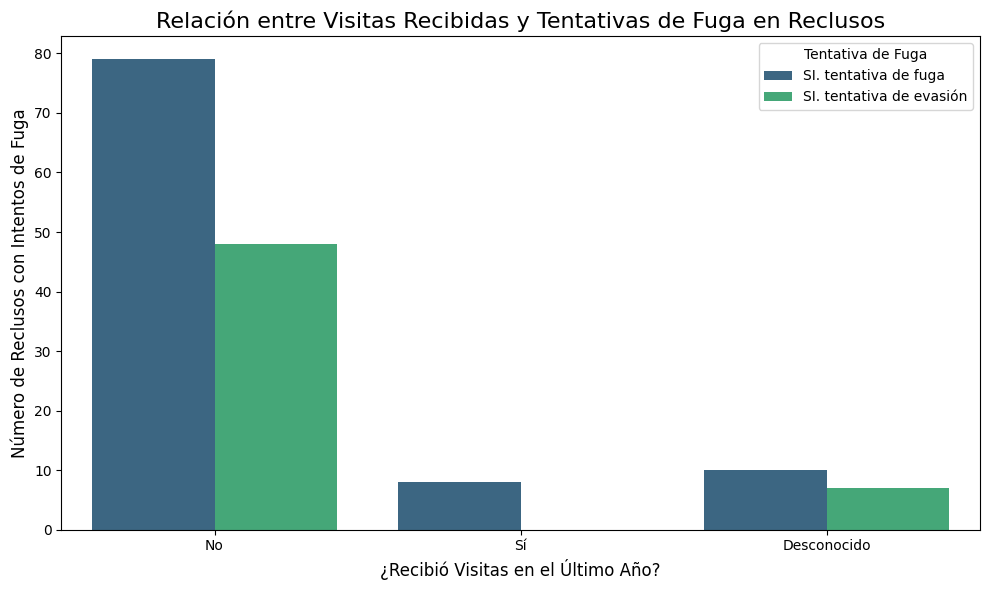

In [ ]:
# Se filtran los reclusos que han participado en intentos de fuga o evasión
reclusos_fuga = df[df['tentativa_fugas_evasiones'].str.contains('SI', case=False, na=False)]


# Se crea el gráfico de barras agrupadas para solo los reclusos con intentos de fuga
plt.figure(figsize=(10, 6))
sns.countplot(
    data=reclusos_fuga,
    x='recibio_visitas_ultimo_anio',
    hue='tentativa_fugas_evasiones',
    palette='viridis',
)

plt.title('Relación entre Visitas Recibidas y Tentativas de Fuga en Reclusos', fontsize=16)
plt.xlabel('¿Recibió Visitas en el Último Año?', fontsize=12)
plt.ylabel('Número de Reclusos con Intentos de Fuga', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['No', 'Sí', 'Desconocido'])
plt.legend(title='Tentativa de Fuga', loc='upper right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


### Hallazgos en relación a la hipótesis

- Al analizar solo a los reclusos que han intentado fugarse, la falta de visitas parece ser un factor significativo en el aumento de los intentos de fuga, lo que apoya la hipótesis de que el aislamiento emocional y la falta de apoyo social pueden incrementar el deseo de escapar.

- Desafío a la hipótesis: Si bien la tendencia es clara para los reclusos sin visitas, no todos los reclusos sin visitas intentan fugarse, y algunos reclusos que sí recibieron visitas también intentaron fugarse. Esto sugiere que la falta de visitas no es el único factor que influye en el comportamiento de fuga. Otros elementos, como las condiciones de vida en prisión, el tiempo de reclusión, y otros aspectos de la salud mental y la vida carcelaria también podrían estar influyendo.

Conclusión: La hipótesis es parcialmente validada, ya que existe una relación positiva entre la falta de visitas y la propensión a intentar fugarse. Los reclusos que no recibieron visitas son más propensos a involucrarse en intentos de fuga en comparación con aquellos que sí recibieron visitas. Sin embargo, es importante no asumir que la falta de visitas es el único factor que provoca los intentos de fuga.